### 머신러닝 시작



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

In [2]:
# 나눔 고딕 폰트의 경로 명시
path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [3]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [4]:
# 파이토치 관련 라이브러리
import torch
from torchviz import make_dot

#### 경사하강법 구현
- Gradient Descent
- Stochastic Gradient Descent 확률적 경사하강법


In [5]:
def L(u, v):
    return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10
def Lu(u, v):
    return 6* u - v + 7
def Lv(u, v):
    return 6* v - u - 7

u = np.linspace(-5, 5, 501)
v = np.linspace(-5, 5, 501)
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [8]:
Z

array([[135.    , 134.6412, 134.2848, ..., 253.3248, 254.1612, 255.    ],
       [134.3612, 134.002 , 133.6452, ..., 252.4868, 253.3228, 254.1612],
       [133.7248, 133.3652, 133.008 , ..., 251.6512, 252.4868, 253.3248],
       ...,
       [113.8848, 113.3268, 112.7712, ..., 133.008 , 133.6452, 134.2848],
       [114.4412, 113.8828, 113.3268, ..., 133.3652, 134.002 , 134.6412],
       [115.    , 114.4412, 113.8848, ..., 133.7248, 134.3612, 135.    ]])

In [9]:
# 경사 하강법 시뮬레이션
W = np.array([4.0, 4.0])
W1 = [W[0]]
W2 = [W[1]]
N = 21
alpha = 0.05
for i in range(N):
    W = W - alpha *np.array([Lu(W[0], W[1]), Lv(W[0], W[1])])
    W1.append(W[0])
    W2.append(W[1])

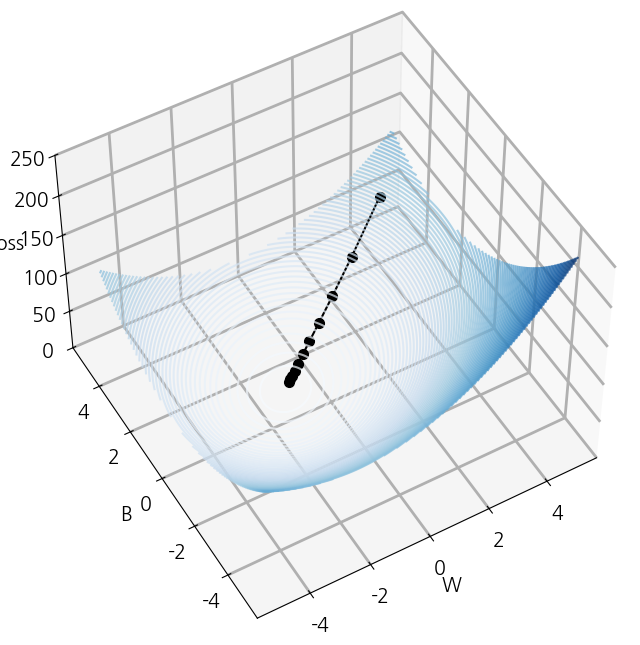

In [12]:
n_loop=11

WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_zlim(0,250)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

#### 데이터 전처리
- 다섯명의 신장과 체중 데이터를 사용. 1차 함수를 사용해 신장으로 체중을 예측하는 경우, 최적 직선을 구하는 것이 목적

In [13]:
# 샘플 데이터 선언
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0,60.1]
])

sampleData1

array([[166. ,  58.7],
       [176. ,  75.7],
       [171. ,  62.1],
       [173. ,  70.4],
       [169. ,  60.1]])

In [14]:
# 머신러닝 모델에서 사용하기 위해, 신장을 변수 x로, 체중을 변수 y로 함
x = sampleData1[:,0]
y = sampleData1[:,1]

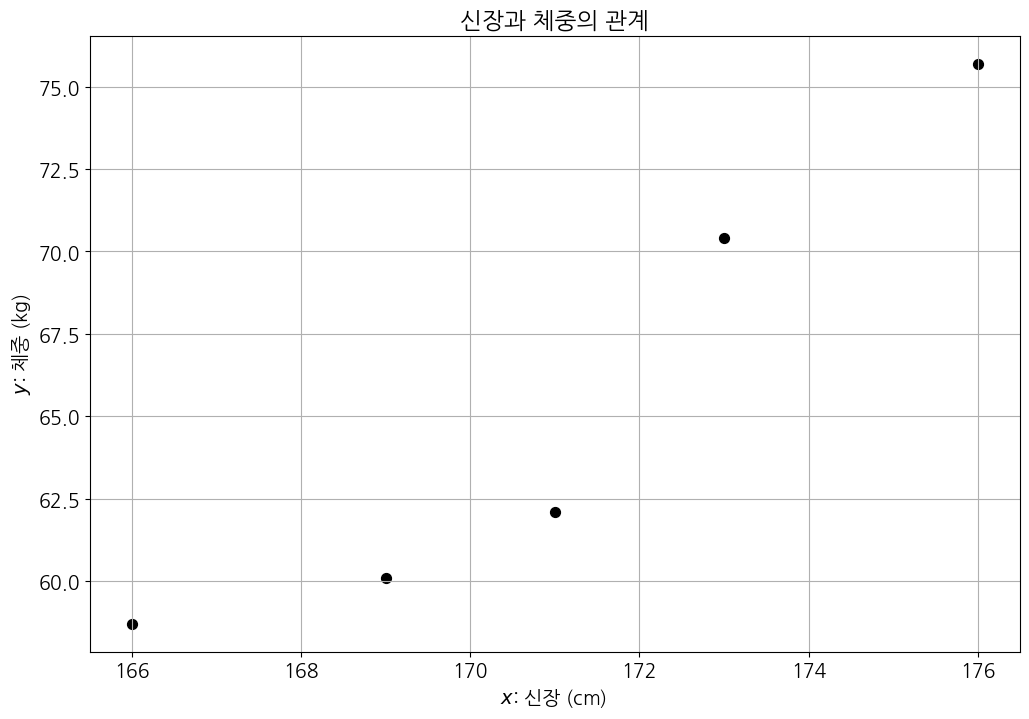

In [15]:
# 산포도 출력 확인
plt.figure(figsize=(12, 8))
plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$: 신장 (cm) ')
plt.ylabel('$y$: 체중 (kg)')
plt.title('신장과 체중의 관계')
plt.show()

#### 데이터 변환

- 머신러닝 모델에서 데이터는 0에 가까운 값을 갖는 것이 바람직. x, y 모두 평균값이 0이 되도록 평행이동시켜서 새로운 좌표계를 X, Y로 함

In [16]:
X = x - x.mean()
Y = y - y.mean()

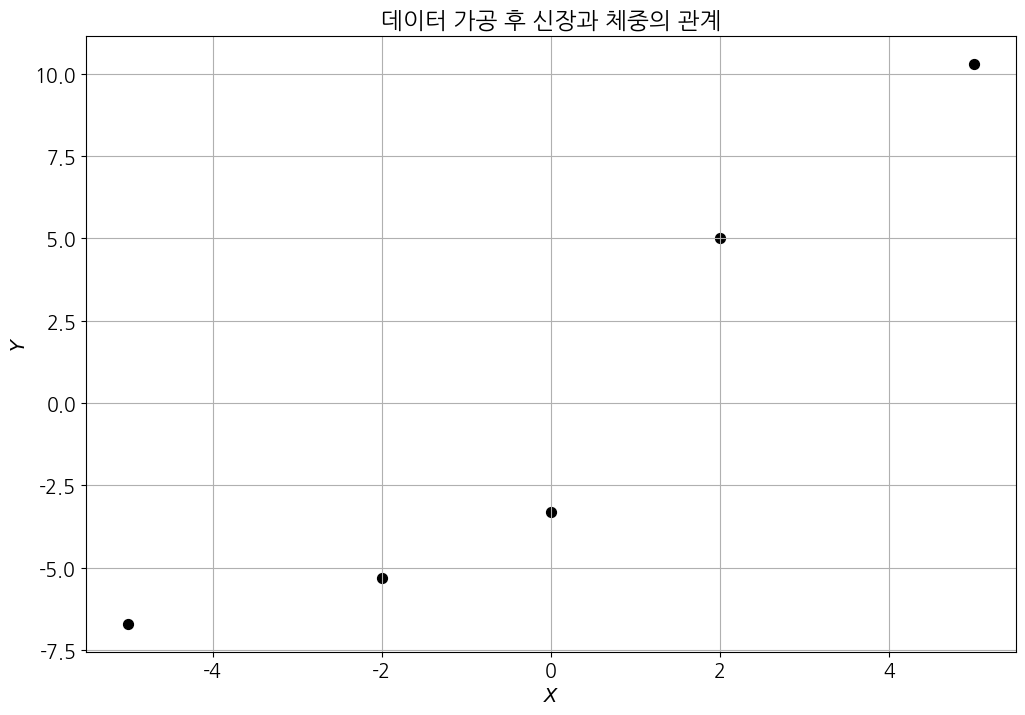

In [17]:
# 산포도를 통해 결과 확인
plt.figure(figsize=(12, 8))

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

#### 예측 계산

In [18]:
# X와 Y를 텐서 변수로 변환

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [19]:
## 결과확인
X, Y

(tensor([-5.,  5.,  0.,  2., -2.]),
 tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000]))

In [20]:
# 파라미터 정의
# W와 B는 경사 계산을 위해, requires_grad=True 로 설정함

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [21]:
W, B

(tensor(1., requires_grad=True), tensor(1., requires_grad=True))

In [22]:
W.data, B.data

(tensor(1.), tensor(1.))

In [23]:
# 예측 함수는 1차 함수

def pred(X):
    return W * X + B

In [24]:
# 예측 값 계산
Yp =  pred(X)

Yp

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)

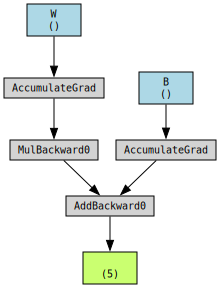

In [25]:
# 예측 값의 계산 그래프 표시

params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

#### 손실 계산

In [26]:
# 평균 제곱 오차 손실함수

def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

In [27]:
# 손실 계산
loss = mse(Yp, Y)

loss

tensor(13.3520, grad_fn=<MeanBackward0>)

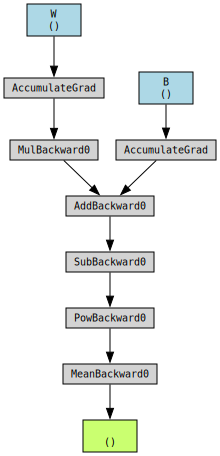

In [28]:
# 손실 계산 그래프 출력

params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

#### 경사 계산

In [29]:
# 경사 계산

loss.backward()

In [30]:
W.grad, B.grad

(tensor(-19.0400), tensor(2.0000))

#### 파라미터 수정

In [31]:
# 학습률 정의

lr = 0.001

In [32]:
#  경사를 기반으로 파라미터 수정

W -= lr * W.grad
B -= lr * B.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

- W와 B는 한번 계산이 끝났기 때문에, 이 상태로 값의 갱신은 불가능. 다음과 같이 수정해야 함

In [33]:
# 경사를 기반으로 파라미터 수정
# with torch.no_grad() 작성 필요

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad
    
    # 계산이 끝난 경삿값을 초기화함
    W.grad.zero_()
    B.grad.zero_()

In [34]:
# 파라미터 경삿값 확인
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


- 경사하강법. 원래 값은 모두 1.0이기 때문에, W는 미소량이 증가, B는 미소량이 감소했음을 확인가능. 이 계산을 반복해서 최적의 W와 B를 구하는 것

#### 반복 계산

In [35]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [36]:
# 반복 처리
for epoch in range(num_epochs):
    # 예측 계산
    Yp = pred(X)
    
    # 손실 계산
    loss = mse(Yp, Y)
    
    # 경사 계산
    loss.backward()
    
    with torch.no_grad():
        # 파라미터 수정
        W -= lr * W.grad
        B -= lr * B.grad
        
        # 경삿값 초기화
        W.grad.zero_()
        B.grad.zero_()
        
    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

#### 결과 평가

In [37]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}') 
print(f'최종상태 : 손실:{history[-1,1]:.4f}') 

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


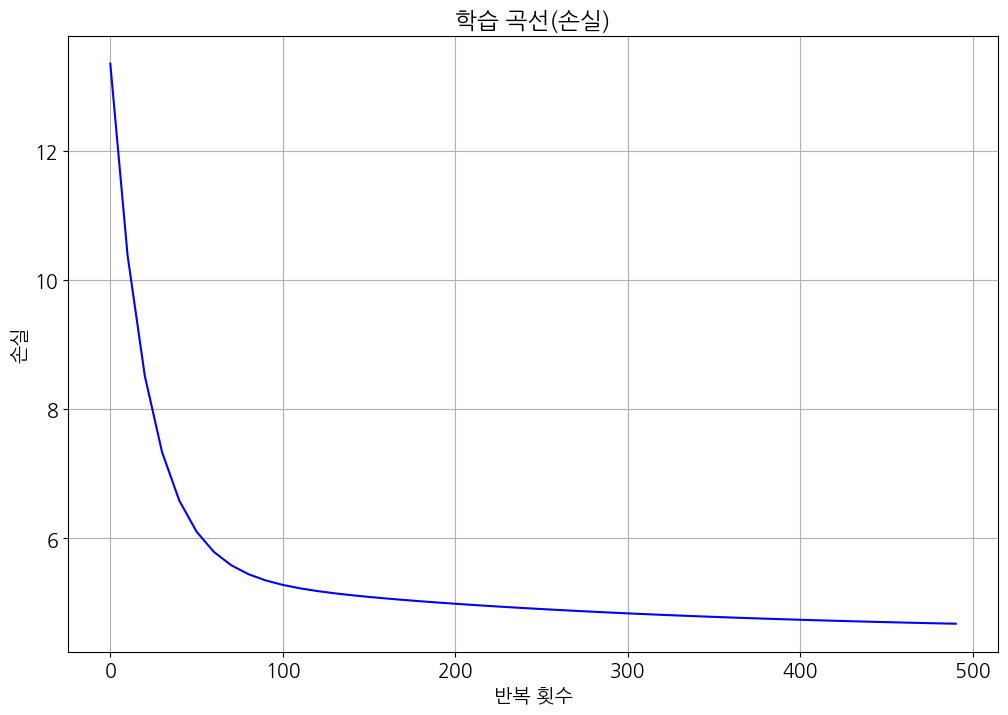

In [38]:
# 학습 곡선 출력(손실)
plt.figure(figsize=(12, 8))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

#### 산포도에 회귀 직선을 동시에 출력

In [39]:
# x의 범위를 구함(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 이와 대응하는 예측값 y를 구함
Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


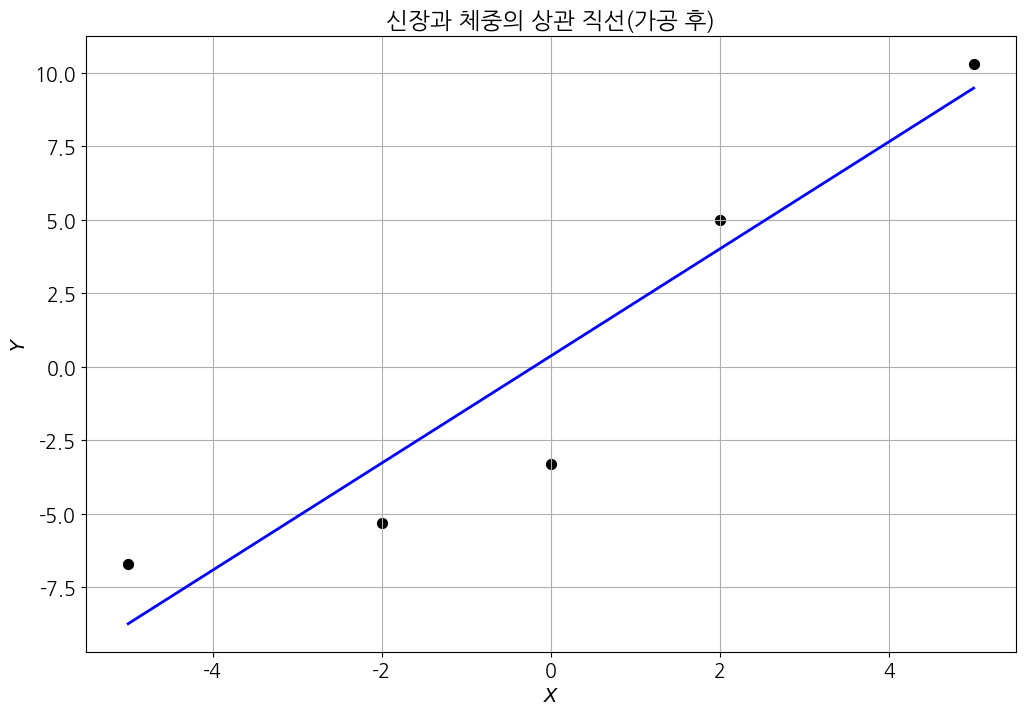

In [41]:
# 그래프 출력
plt.figure(figsize=(12, 8))
plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 후)')
plt.show()

#### 가공 전 데이터로 회귀 직선 출력

In [42]:
# y좌표와 x좌표 값 계산

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

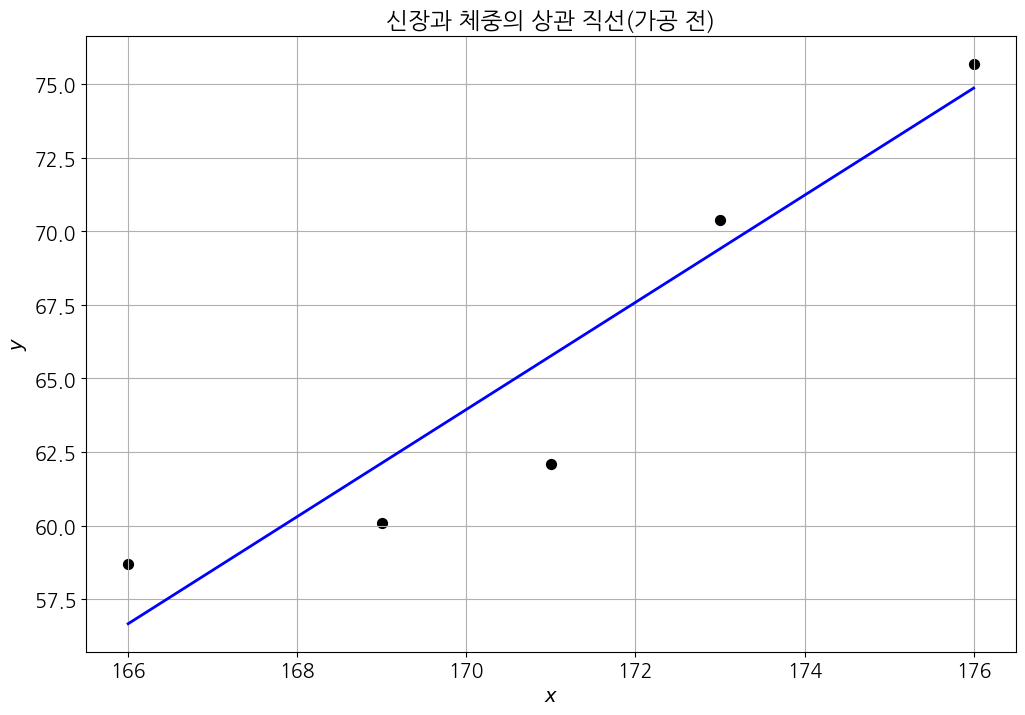

In [43]:
# 그래프 출력
plt.figure(figsize=(12, 8))

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 전)')
plt.show()

#### 최적화 함수와 step 함수 이용

In [44]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer 로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [45]:
# 반복 처리
for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)
    
    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()
    
    # 경삿값 초기화
    optimizer.zero_grad()
        
    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

In [46]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}') 
print(f'최종상태 : 손실:{history[-1,1]:.4f}') 

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


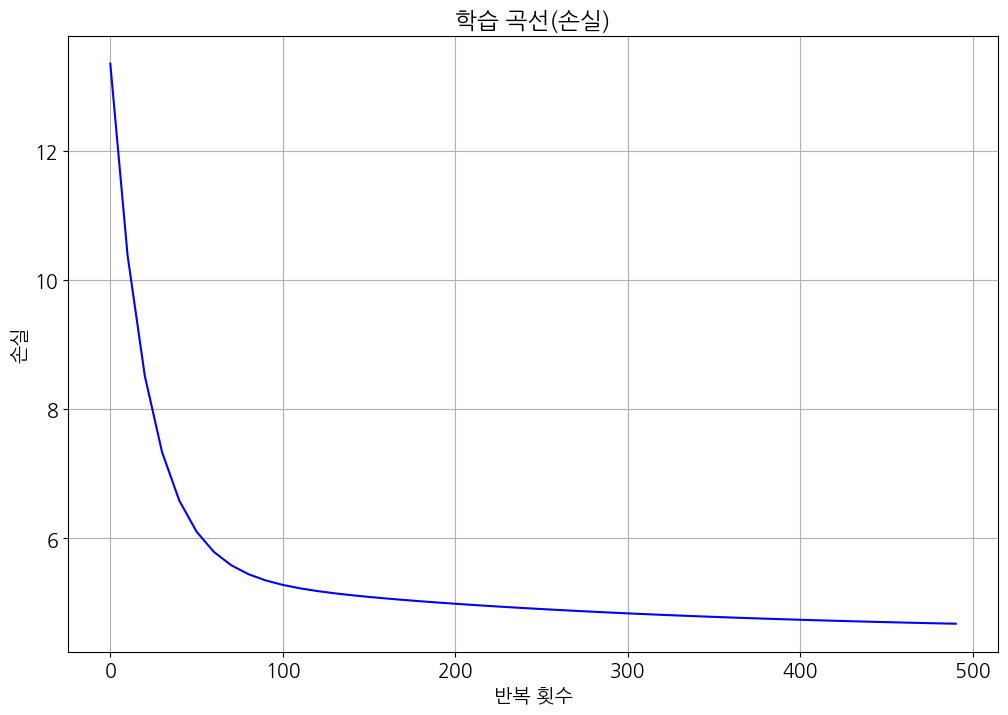

In [47]:
# 학습 곡선 출력(손실)
plt.figure(figsize=(12, 8))

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

- step 함수는 다음의 코드와 같은 로직을 수행

```python
with torch.no_grad():
	# 파라미터 수정
	# 프레임워크를 사용하는 경우는 step 함수가 이를 대신함
	W -= lr * W.grad
	B -= lr * B.grad
```

#### 최적화 함수 튜닝

In [48]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# history 기록을 위한 배열 초기화
history2 = np.zeros((0, 2))

In [49]:
# 반복 처리
for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)
    
    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()
    
    # 경삿값 초기화
    optimizer.zero_grad()
        
    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 5.7585
epoch = 20  loss = 5.9541
epoch = 30  loss = 5.0276
epoch = 40  loss = 4.8578
epoch = 50  loss = 4.7052
epoch = 60  loss = 4.6327
epoch = 70  loss = 4.5940
epoch = 80  loss = 4.5698
epoch = 90  loss = 4.5574
epoch = 100  loss = 4.5495
epoch = 110  loss = 4.5452
epoch = 120  loss = 4.5426
epoch = 130  loss = 4.5411
epoch = 140  loss = 4.5403
epoch = 150  loss = 4.5398
epoch = 160  loss = 4.5395
epoch = 170  loss = 4.5393
epoch = 180  loss = 4.5392
epoch = 190  loss = 4.5391
epoch = 200  loss = 4.5391
epoch = 210  loss = 4.5391
epoch = 220  loss = 4.5391
epoch = 230  loss = 4.5390
epoch = 240  loss = 4.5390
epoch = 250  loss = 4.5390
epoch = 260  loss = 4.5390
epoch = 270  loss = 4.5390
epoch = 280  loss = 4.5390
epoch = 290  loss = 4.5390
epoch = 300  loss = 4.5390
epoch = 310  loss = 4.5390
epoch = 320  loss = 4.5390
epoch = 330  loss = 4.5390
epoch = 340  loss = 4.5390
epoch = 350  loss = 4.5390
epoch = 360  loss = 4.5390
epoch = 370

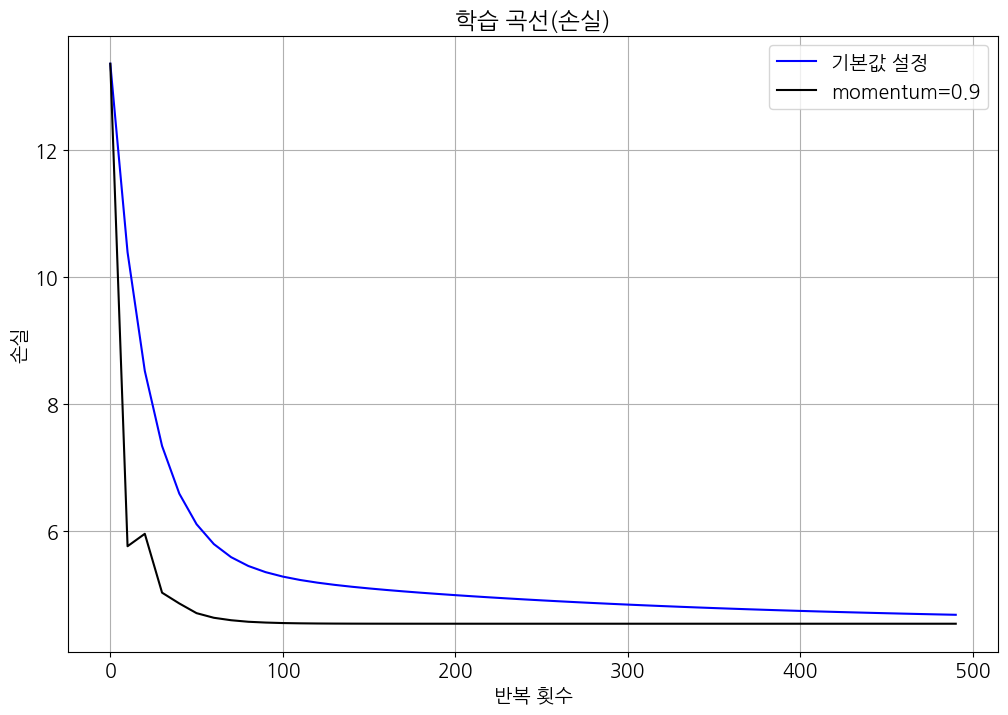

In [50]:
# 학습 곡선(손실) 출력
plt.figure(figsize=(12, 8))

plt.plot(history[:,0], history[:,1], 'b', label='기본값 설정')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend()
plt.title('학습 곡선(손실)')
plt.show()

#### 국소적 최적화 문제

In [51]:
def f(x):
    return x * (x+1) * (x+2) * (x-2)

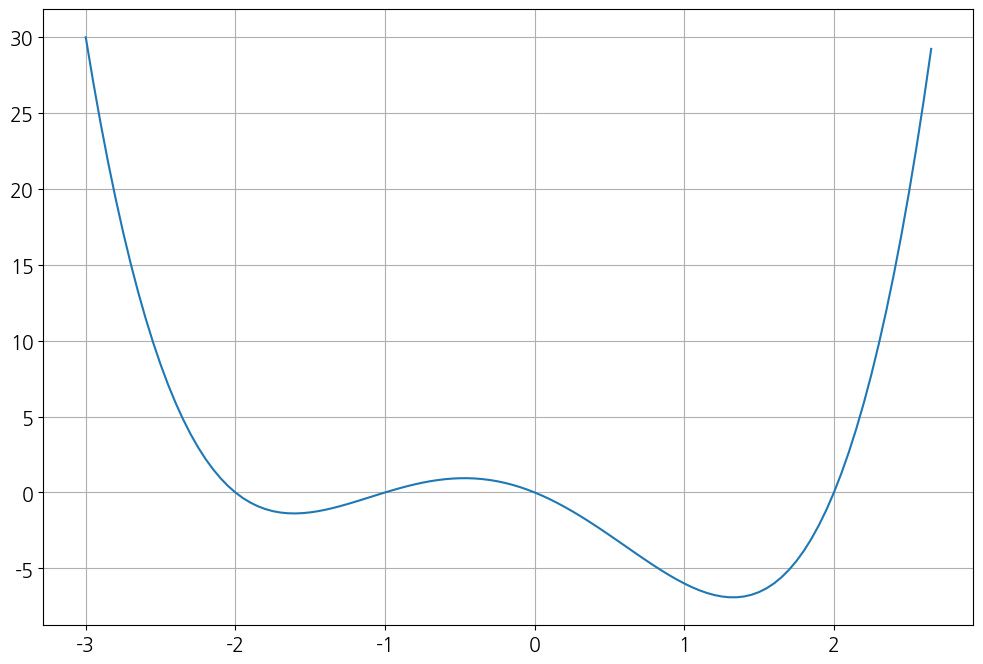

: 

In [54]:
x = np.arange(-3, 2.7, 0.05)
y = f(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y)
# plt.axis('off')
plt.show()